In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np

In [2]:
""""Load Cifar-10 dataset"""
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

# Normalize values to 0-1
train_images = train_images/255.0
test_images = test_images/255.0

In [4]:
"""Create model - CNN"""
# build model with 2 conv layers | 32x32, 3 channels
model = models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile model with sgd and sparse categorical loss function
model.compile(optimizer='sgd',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

# fit model for 20 epochs
num_epochs = 20
model_fit = model.fit(train_images,train_labels,epochs=num_epochs,
                        validation_data=(test_images,test_labels))




Epoch 1/20
1563/1563 [==============================] - 11s 4ms/step - loss: 2.0352 - acc: 0.2671 - val_loss: 1.8587 - val_acc: 0.3380
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6614 - acc: 0.4052 - val_loss: 1.5123 - val_acc: 0.4603
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4670 - acc: 0.4756 - val_loss: 1.4017 - val_acc: 0.4998
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3600 - acc: 0.5186 - val_loss: 1.3433 - val_acc: 0.5173
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2758 - acc: 0.5497 - val_loss: 1.2476 - val_acc: 0.5595
Epoch 6/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2022 - acc: 0.5801 - val_loss: 1.2367 - val_acc: 0.5614
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1428 - acc: 0.5994 - val_loss: 1.2016 - val_acc: 0.5802
Epoch 8/20
1563/1563 [==============================] - 5s 3m

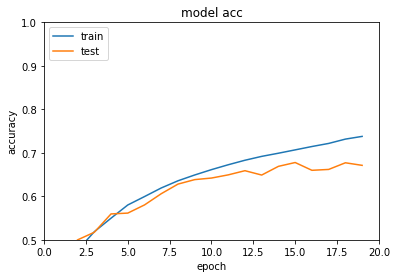

In [23]:
# plot results summary
plt.plot(model_fit.history['acc'])
plt.plot(model_fit.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,num_epochs])
plt.ylim([0.5,1.0])
plt.show()

In [5]:
print(test_labels[:100])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]
 [6]
 [5]
 [4]
 [5]
 [9]
 [2]
 [4]
 [1]
 [9]
 [5]
 [4]
 [6]
 [5]
 [6]
 [0]
 [9]
 [3]
 [9]
 [7]
 [6]
 [9]
 [8]
 [0]
 [3]
 [8]
 [8]
 [7]
 [7]
 [4]
 [6]
 [7]
 [3]
 [6]
 [3]
 [6]
 [2]
 [1]
 [2]
 [3]
 [7]
 [2]
 [6]
 [8]
 [8]
 [0]
 [2]
 [9]
 [3]
 [3]
 [8]
 [8]
 [1]
 [1]
 [7]
 [2]
 [5]
 [2]
 [7]
 [8]
 [9]
 [0]
 [3]
 [8]
 [6]
 [4]
 [6]
 [6]
 [0]
 [0]
 [7]]


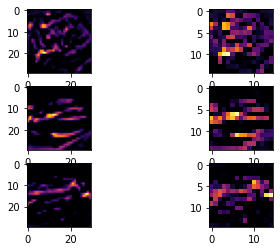

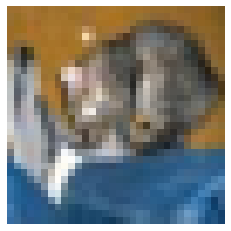

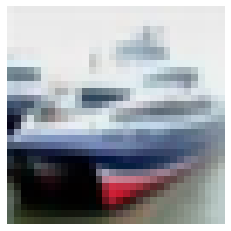

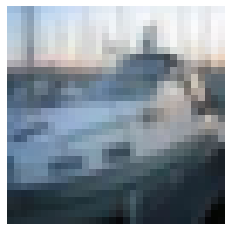

In [29]:
"""visualize data"""
def show_images(img,validation_data,data_shape):
    plt.figure()
    plt.imshow(val_images[img].reshape(data_shape[0],data_shape[1],data_shape[2]))
    plt.grid(False)
    plt.axis('off')
    plt.show()

# set up plots
f, axarr = plt.subplots(3,2)
first_image = 0
second_image = 1
third_image = 2

convolution_number = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs = layer_outputs)

# create color map for each output for visualization
data_shape = (32,32,3)      #specify data shape (x_dim, y_dim, channels)
val_images = test_images
for x in range(0,2):
    f1 = activation_model.predict(val_images[first_image].reshape(1,data_shape[0],data_shape[1],data_shape[2]))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number],cmap = 'inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(val_images[second_image].reshape(1,data_shape[0],data_shape[1],data_shape[2]))[x]
    axarr[1,x].imshow(f2[0,:,:,convolution_number],cmap = 'inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(val_images[third_image].reshape(1,data_shape[0],data_shape[1],data_shape[2]))[x]
    axarr[2,x].imshow(f3[0,:,:,convolution_number],cmap = 'inferno')
    axarr[2,x].grid(False)

# display images altogether
show_images(first_image,validation_data=val_images,data_shape=data_shape)
show_images(second_image,validation_data=val_images,data_shape=data_shape)
show_images(third_image,validation_data=val_images,data_shape=data_shape)

In [18]:
# compile same model with better optimzer
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])

# fit model
model_fit_optimized = model.fit(train_images,train_labels,epochs=num_epochs,
                                validation_data=(test_images,test_labels))


Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8877 - acc: 0.6929 - val_loss: 0.9725 - val_acc: 0.6677
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8059 - acc: 0.7196 - val_loss: 0.9114 - val_acc: 0.6860
Epoch 3/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7364 - acc: 0.7440 - val_loss: 0.8759 - val_acc: 0.7041
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6732 - acc: 0.7666 - val_loss: 0.9260 - val_acc: 0.6944
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6285 - acc: 0.7804 - val_loss: 0.9207 - val_acc: 0.6969
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5910 - acc: 0.7939 - val_loss: 0.9193 - val_acc: 0.7088
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5507 - acc: 0.8079 - val_loss: 0.9679 - val_acc: 0.6970
Epoch 8/20
1563/1563 [==============================] - 5s 3ms

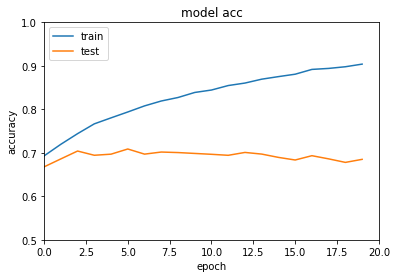

In [22]:
# plot results
plt.plot(model_fit_optimized.history['acc'])
plt.plot(model_fit_optimized.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,num_epochs])
plt.ylim([0.5,1.0])
plt.show()